<a href="https://colab.research.google.com/github/GuangyuNie/MAE_598_Optimization/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P1  
The problem can be formulated as:
\begin{equation}
\min_{A12, A21} \sum_1^{11} (\hat{p} - p)^2
\end{equation}  

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x1 = torch.linspace(0,1,11)
x2 = 1 - x1
a = torch.tensor([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]])
T = 20

p_water = 10 ** (a[0, 0] - a[0, 1] / (T + a[0, 2]))
p_dio = 10 ** (a[1, 0] - a[1, 1] / (T + a[1, 2]))
p_real = torch.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])

A = torch.tensor([1.,1.],requires_grad=True)
steps = 100
lr = 1e-3
for i in range(steps):

  p_hat = x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p_water + \
    x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p_dio
  L = torch.sum((p_hat - p_real) ** 2)

  L.backward()
  with torch.no_grad():
    A += -lr*A.grad
    A.grad.zero_()

  if (i+1)%10 == 0: 
    print('Steps: {} Loss: {} A12: {:.4f} A21: {:.4f}'.format(i+1,L,A[0].item(),A[1].item()))

p_hat = p_hat.detach().numpy()
p_real = p_real.detach().numpy()
x1 = x1.detach().numpy()


      



Steps: 10 Loss: 0.8566118478775024 A12: 1.9179 A21: 1.7236
Steps: 20 Loss: 0.6902010440826416 A12: 1.9450 A21: 1.7004
Steps: 30 Loss: 0.6723960638046265 A12: 1.9539 A21: 1.6929
Steps: 40 Loss: 0.6704491972923279 A12: 1.9569 A21: 1.6904
Steps: 50 Loss: 0.6702359914779663 A12: 1.9579 A21: 1.6896
Steps: 60 Loss: 0.6702125668525696 A12: 1.9583 A21: 1.6893
Steps: 70 Loss: 0.6702074408531189 A12: 1.9584 A21: 1.6892
Steps: 80 Loss: 0.6702107191085815 A12: 1.9584 A21: 1.6892
Steps: 90 Loss: 0.6702101826667786 A12: 1.9584 A21: 1.6892
Steps: 100 Loss: 0.6702091097831726 A12: 1.9584 A21: 1.6892


[28.82411  34.644314 36.45297  36.867313 36.87401  36.749832 36.390446
 35.384823 32.947784 27.730003 17.473242] [28.1 34.4 36.7 36.9 36.8 36.7 36.5 35.4 32.9 27.7 17.5] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


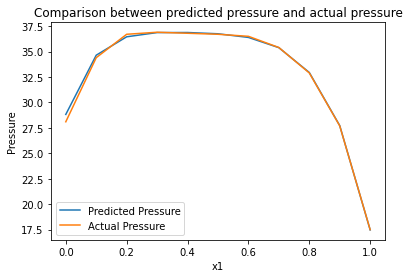

In [33]:

plt.plot(x1, p_hat, label='Predicted Pressure')
plt.plot(x1, p_real, label='Actual Pressure')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Comparison between predicted pressure and actual pressure')
plt.show()

The predicted model fit the real data very well.

P2: 

In [37]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.1 MB/s 


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize

In [48]:
def f(x):
    return (4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2 + x[0] * x[1] + (-4 + 4 * x[1] ** 2) * x[1] ** 2

In [55]:
res = gp_minimize(f,                  # the function to minimize
                  [(-3.0, 3.0),(-2.0,2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.001**2,       # the noise level (optional)
                  random_state=1234)

print('Objective: {:.4f} x1: {:.4f} x2: {:.4f}'.format(res.fun,res.x[0],res.x[1]))

Objective: -1.0307 x1: 0.0913 x2: -0.7019


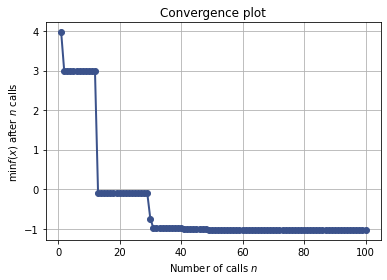

In [56]:
from skopt.plots import plot_convergence
plot_convergence(res);